This is a snapshot of a dataset created by Tony Pino.

It was scraped from publicly available results posted every week from Domain.com.au. He cleaned it well, and now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Load Housing Data into dataframe
df = pd.read_csv(os.path.join(dirname, 'train.csv'), index_col='Id')
df.shape

(1460, 80)

In [3]:
# Look at the df columns
print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
# Adding target_label for independent feature column name
target_label = 'SalePrice'

In [5]:
# Look at the quick description of dataframe
print(df.describe())

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

In [6]:
# Look at the df head 
print(df.head())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

In [7]:
# Look at the df tail 
print(df.tail())

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460    

In [8]:
# Look at the datatype of each column
print(df.dtypes)

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object


In [9]:
# Find Categorical and numerical feature columns
categorical_features = [col for col in df.columns if df[col].dtype=='object']
numerical_features = list(set(df.columns) - set(categorical_features))
print(len(categorical_features))
print(len(numerical_features))

43
37


In [10]:
# Data description of categorical features
print(df[categorical_features].describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA      

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

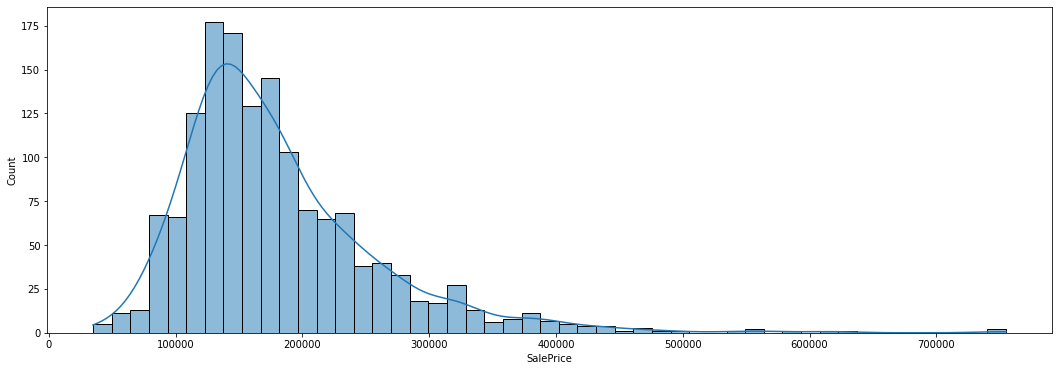

In [11]:
fig = plt.figure(figsize=(18, 6))
sns.histplot(df['SalePrice'], kde=True)

Most of the density lies between 100k and 250k, but there appears to be a lot of outliers on the pricier side.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

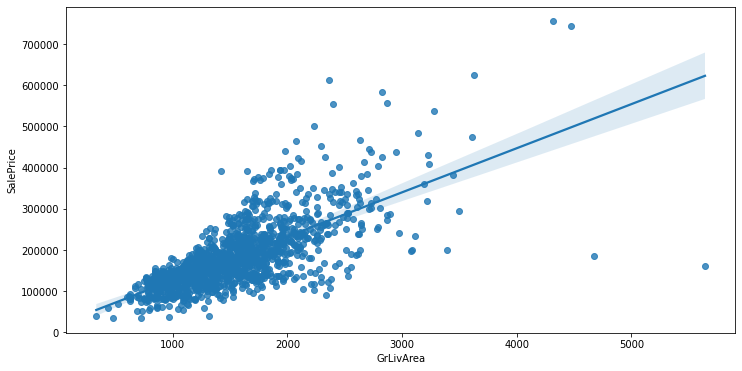

In [12]:
fig = plt.figure(figsize=(12, 6))
sns.regplot(x=df['GrLivArea'], y=df['SalePrice'])

You might’ve expected that larger living area should mean a higher price. This chart shows you’re generally correct. But what are those 2–3 “cheap” houses offering huge living area?

One column you might not think about exploring is the “TotalBsmtSF” — Total square feet of the basement area, but let’s do it anyway:

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

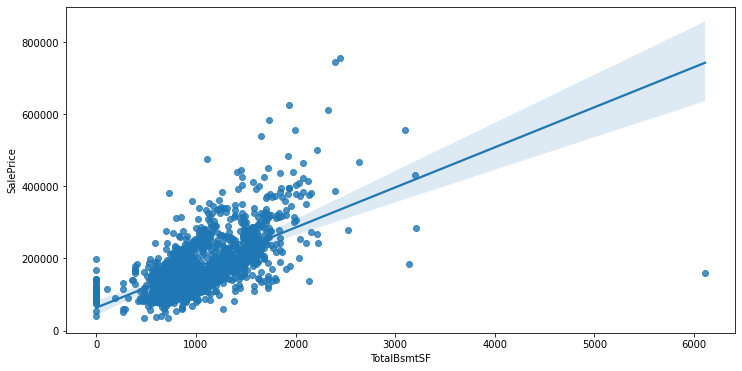

In [13]:
fig = plt.figure(figsize=(12, 6))
sns.regplot(x=df['TotalBsmtSF'], y=df['SalePrice'])

Intriguing, isn’t it? The basement area seems like it might have a lot of predictive power for our model.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

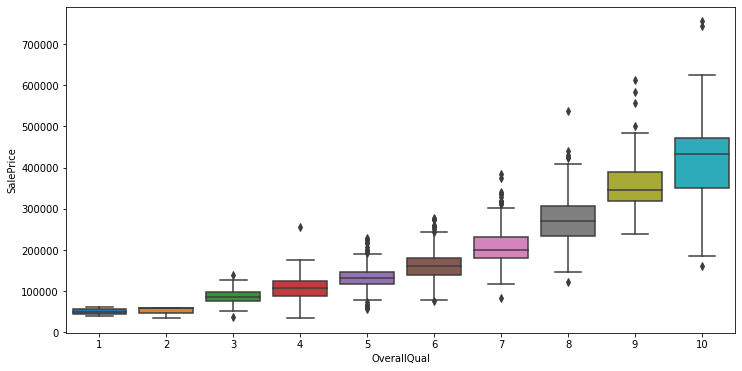

In [14]:
fig = plt.figure(figsize=(12, 6))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])

Everything seems fine for this one, except that when you look to the right things start getting much more nuanced. Will that “confuse” our model?

Let’s have a more general view on the top 10 correlated features with dependent/independent features:

<AxesSubplot:xlabel='B', ylabel='A'>

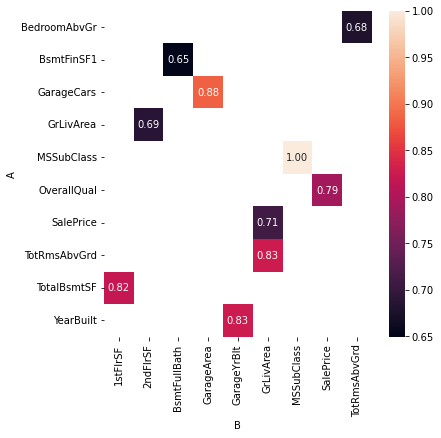

In [15]:
fig = plt.figure(figsize=(6, 6))
df_corr = df.corr().abs()
df_corr_sorted = df_corr.unstack().sort_values(ascending=False).drop_duplicates()
df_corr_sorted = pd.DataFrame(df_corr_sorted).reset_index()
# Adding dummy columns name for pivoting
df_corr_sorted.columns = ['A', 'B', 'C']
sns.heatmap(df_corr_sorted[:10].pivot(values='C', index='A', columns='B'), annot=True, fmt='.2f')

Let’s have a more general view on the top 10 correlated features with independent feature i.e. SalePrice:

<AxesSubplot:>

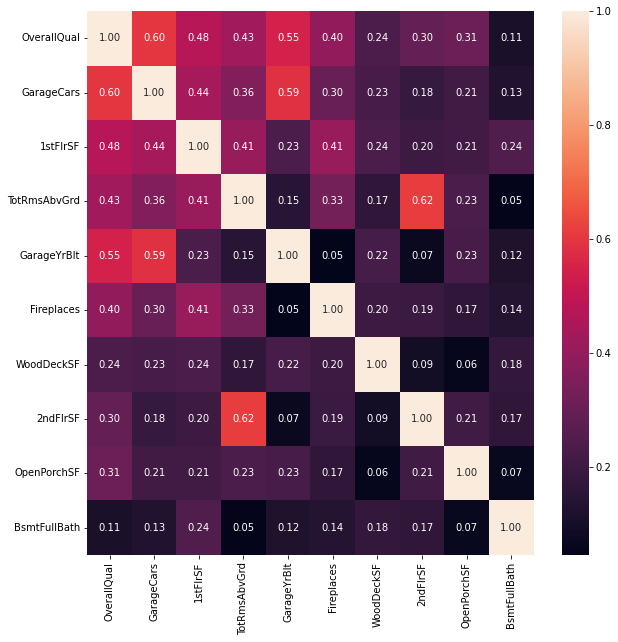

In [16]:
fig = plt.figure(figsize=(10, 10))
df_corr = df.corr().abs()
df_corr_sorted = df_corr.unstack().sort_values(ascending=False).drop_duplicates()
df_corr_sorted = pd.DataFrame(df_corr_sorted).reset_index()
# Adding dummy columns name for pivoting
df_corr_sorted.columns = ['A', 'B', 'C']
top_corr_features_with_target = df_corr_sorted[df_corr_sorted['B']=='SalePrice'][:10]['A']
sns.heatmap(pd.DataFrame(df_corr[top_corr_features_with_target]).loc[top_corr_features_with_target, top_corr_features_with_target], annot=True, fmt='.2f')

Do we have missing values?

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

1. Feature columns MiscFeature, Fence, PoolQC, FireplaceQul, Alley has >80% missing values. It'll be a good idea to drop those columns as they can add noise instead of adding value to the model.

2. Removing Categorical features for now for simplicity.

In [18]:
print(df.columns)
feature_col_drop = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley']
df.drop(columns=feature_col_drop, inplace=True)

# Not needed to remove here as we are selecting numerical features only before imputation.
# df.drop(columns=categorical_features, inplace=True)

# update numerical feature list
numerical_features = list(set(numerical_features) - set(feature_col_drop))

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Imputing remaing missing values

In [19]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

target_label = ['SalePrice']
feature_columns = list(set(numerical_features) - set(target_label))

it_imputer = IterativeImputer(max_iter=10)
train_data = pd.DataFrame(it_imputer.fit_transform(df[feature_columns]),\
                          columns=df[feature_columns].columns)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   float64
 1   GarageCars     1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   BsmtFullBath   1460 non-null   float64
 4   YearRemodAdd   1460 non-null   float64
 5   BsmtHalfBath   1460 non-null   float64
 6   GrLivArea      1460 non-null   float64
 7   TotRmsAbvGrd   1460 non-null   float64
 8   1stFlrSF       1460 non-null   float64
 9   ScreenPorch    1460 non-null   float64
 10  BsmtFinSF1     1460 non-null   float64
 11  OpenPorchSF    1460 non-null   float64
 12  Fireplaces     1460 non-null   float64
 13  WoodDeckSF     1460 non-null   float64
 14  GarageYrBlt    1460 non-null   float64
 15  BsmtFinSF2     1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  3SsnPorch      1460 non-null   float64
 18  YrSold  

Linear Regression

In [20]:
X = train_data[feature_columns]
y = df[target_label]

In [21]:
X.shape

(1460, 36)

Feature Scaling

In [22]:
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X] 

In [23]:
class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.
    
        Parameters
        ----------
        eta : float
            Learning Rate
        n_iterations : int
            No of passes over the training set.
            
        Attributes
        __________
        w_ : weights after the model.
        cost_ : total error of the model after each iteration.
                
    """
    
    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations
        
    def fit(self, x, y):
        """Fit the training data.
        
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
            
        Returns
        -------
        self : object
        """
        
        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]
        
        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta/(m)) * gradient_vector
            cost = np.sum(residuals ** 2) / (2 * m)
            self.cost_.append(cost)
            
        return self
    
    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        
        return np.dot(x, self.w_)

In [24]:
linear_regressor = LinearRegressionUsingGD(0.01, 2000)
linear_regressor = linear_regressor.fit(X, y)

<AxesSubplot:>

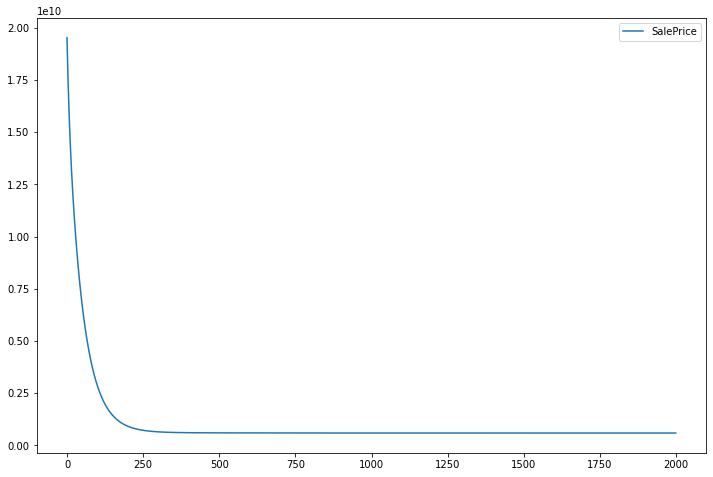

In [25]:
fig = plt.figure(figsize=(12, 8))
sns.lineplot(data=pd.DataFrame(linear_regressor.cost_, range(len(linear_regressor.cost_))))

Evaluating the performance of the model

We will be using Root mean squared error(RMSE) and Coefficient of Determination(R² score) to evaluate our model.
RMSE is the square root of the average of the sum of the squares of residuals.
RMSE is defined by

![L](https://miro.medium.com/max/594/1*-j7StdUGMAFvLGx7hD-Nzg.png)


In [26]:
# mean squared error
y_pred = linear_regressor.predict(X)
mse = np.sum((y_pred - y)**2)/ X.shape[0]

# root mean squared error
rmse = np.sqrt(mse)
print(mse)
print(rmse)

SalePrice    1.179131e+09
dtype: float64
SalePrice    34338.478285
dtype: float64


In [27]:
# sum of square of residuals
ssr = np.sum((y_pred - y)**2)
print(ssr)
#  total sum of squares
sst = np.sum((y - np.mean(y))**2)
print(sst)
# R2 score
r2_score = 1 - (ssr/sst)
print(r2_score)

SalePrice    1.721531e+12
dtype: float64
SalePrice    9.207911e+12
dtype: float64
SalePrice    0.813038
dtype: float64


Predict House Price for test data

In [28]:
test_data = pd.read_csv(os.path.join(dirname, 'test.csv'))

# Prepare test data
test_data_id = test_data['Id']
test_data.drop(columns=feature_col_drop, inplace=True)
test_data = it_imputer.transform(test_data[feature_columns])

Feature Scaling for test data

In [29]:
test_data = (test_data - test_data.mean()) / test_data.std()
test_data = np.c_[np.ones(test_data.shape[0]), test_data]

Predict for test data

In [30]:
test_pred = linear_regressor.predict(test_data)
# print(pd.DataFrame(test_pred)[0])
print(test_data_id)
output = pd.DataFrame({'Id': test_data_id,
                       'SalePrice': pd.DataFrame(test_pred)[0]})
output.to_csv('submission.csv', index=False)

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64
